<a href="https://colab.research.google.com/github/rodrigopbbr/mineracao_de_dados/blob/main/Matrix_de_Confusao_Precisao_Recall_F1_e_Roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

In [ ]:
# import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

#Arvore de Decisao

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

#acuracia da arvore

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.79

 ---------------------------

Acurácia de Teste: 0.79


#Matrix de Confusão da Árvore

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

print("Matrix de Confusão:")
titanic_cm = confusion_matrix( y_test_true ,  y_test_pred)
print(titanic_cm)



Acurácia de Teste: 0.79
Matrix de Confusão:
[[107   1]
 [ 36  35]]


#Precisao, Recall e Medida F1 da arvore

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_true , y_test_pred).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true negatives  (tn) =  107
Number of true positives  (tp) =  35
Number of false negatives (fn) =  36
Number of false positives (fp) =  1
Precision                                          = tp / (tp + fp) = 0.9722222222222222
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.49295774647887325
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.9907407407407407
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.009259259259259259
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.5070422535211268


#Medida F1, Precision e Recall da Árvore 

In [ ]:
f1_score( y_test_true , y_test_pred )

0.6542056074766356

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_true , y_test_pred )


0.9722222222222222

In [ ]:
recall_score(y_test_true , y_test_pred )

0.49295774647887325

#Heatmap da Matriz de Confusao da Árvore

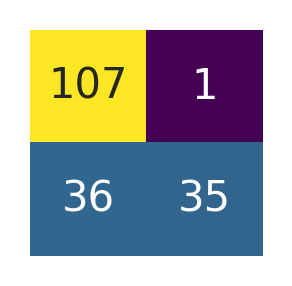

In [ ]:
cm_df =  titanic_cm 
# set the size of the figure
plt.figure(figsize = (1,1))
sns.heatmap(cm_df, 
           annot=True, annot_kws={"size": 10},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

#ROC da Árvore

AUC =  0.741849243609807


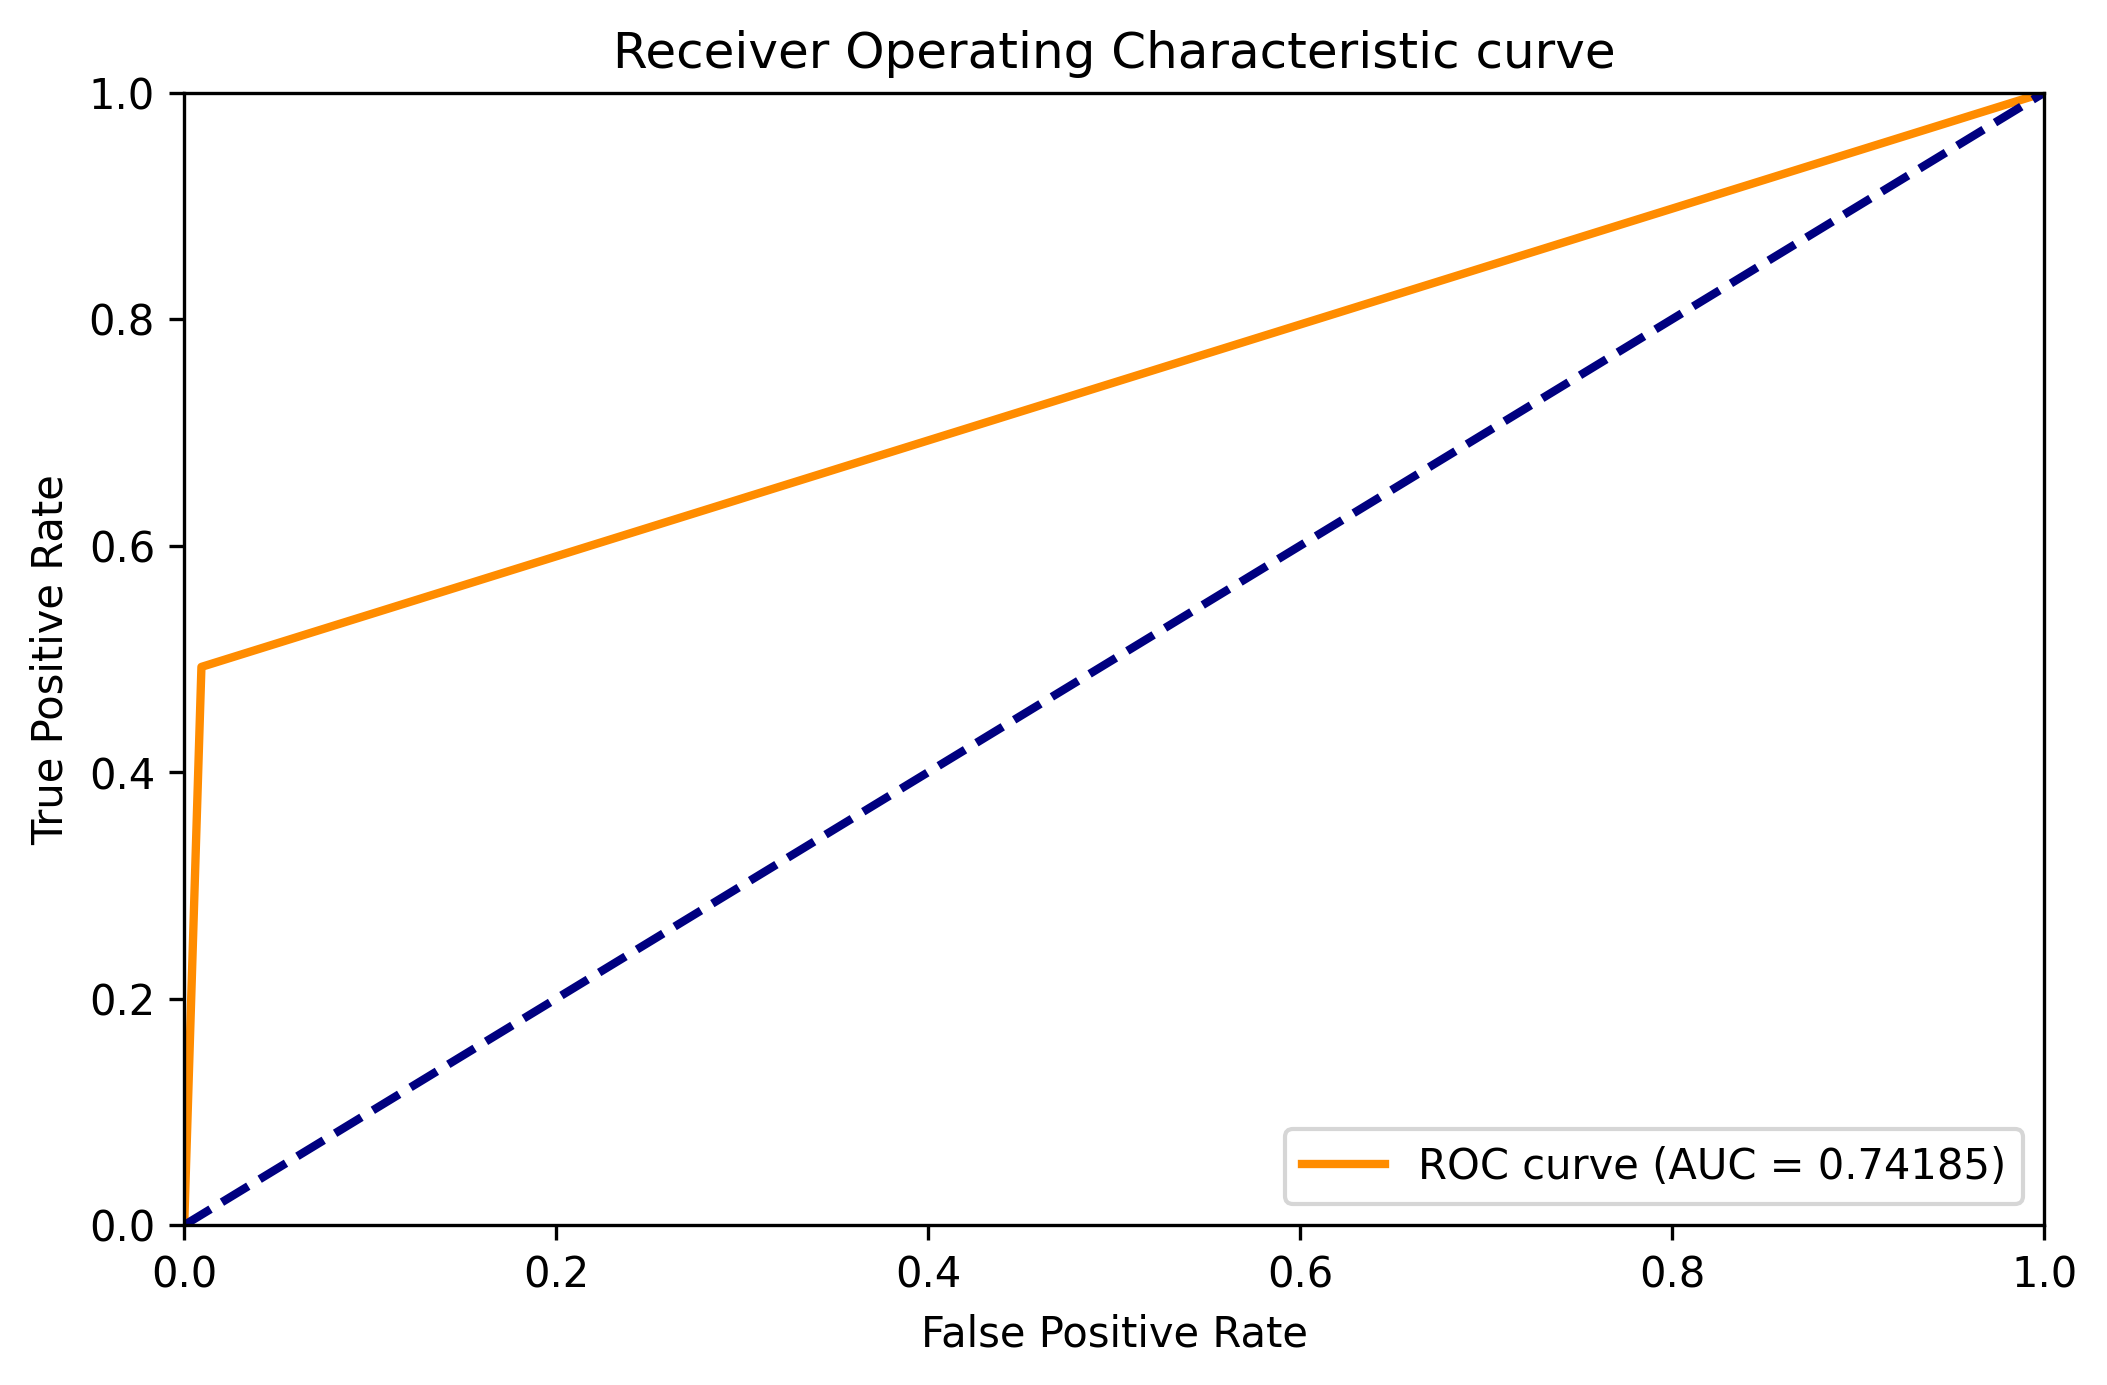

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve( y_test_true , y_test_pred)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score( y_test_true , y_test_pred )
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

# P x R da Arvore

Text(0.5, 1.0, '2-class Precision-Recall curve:')

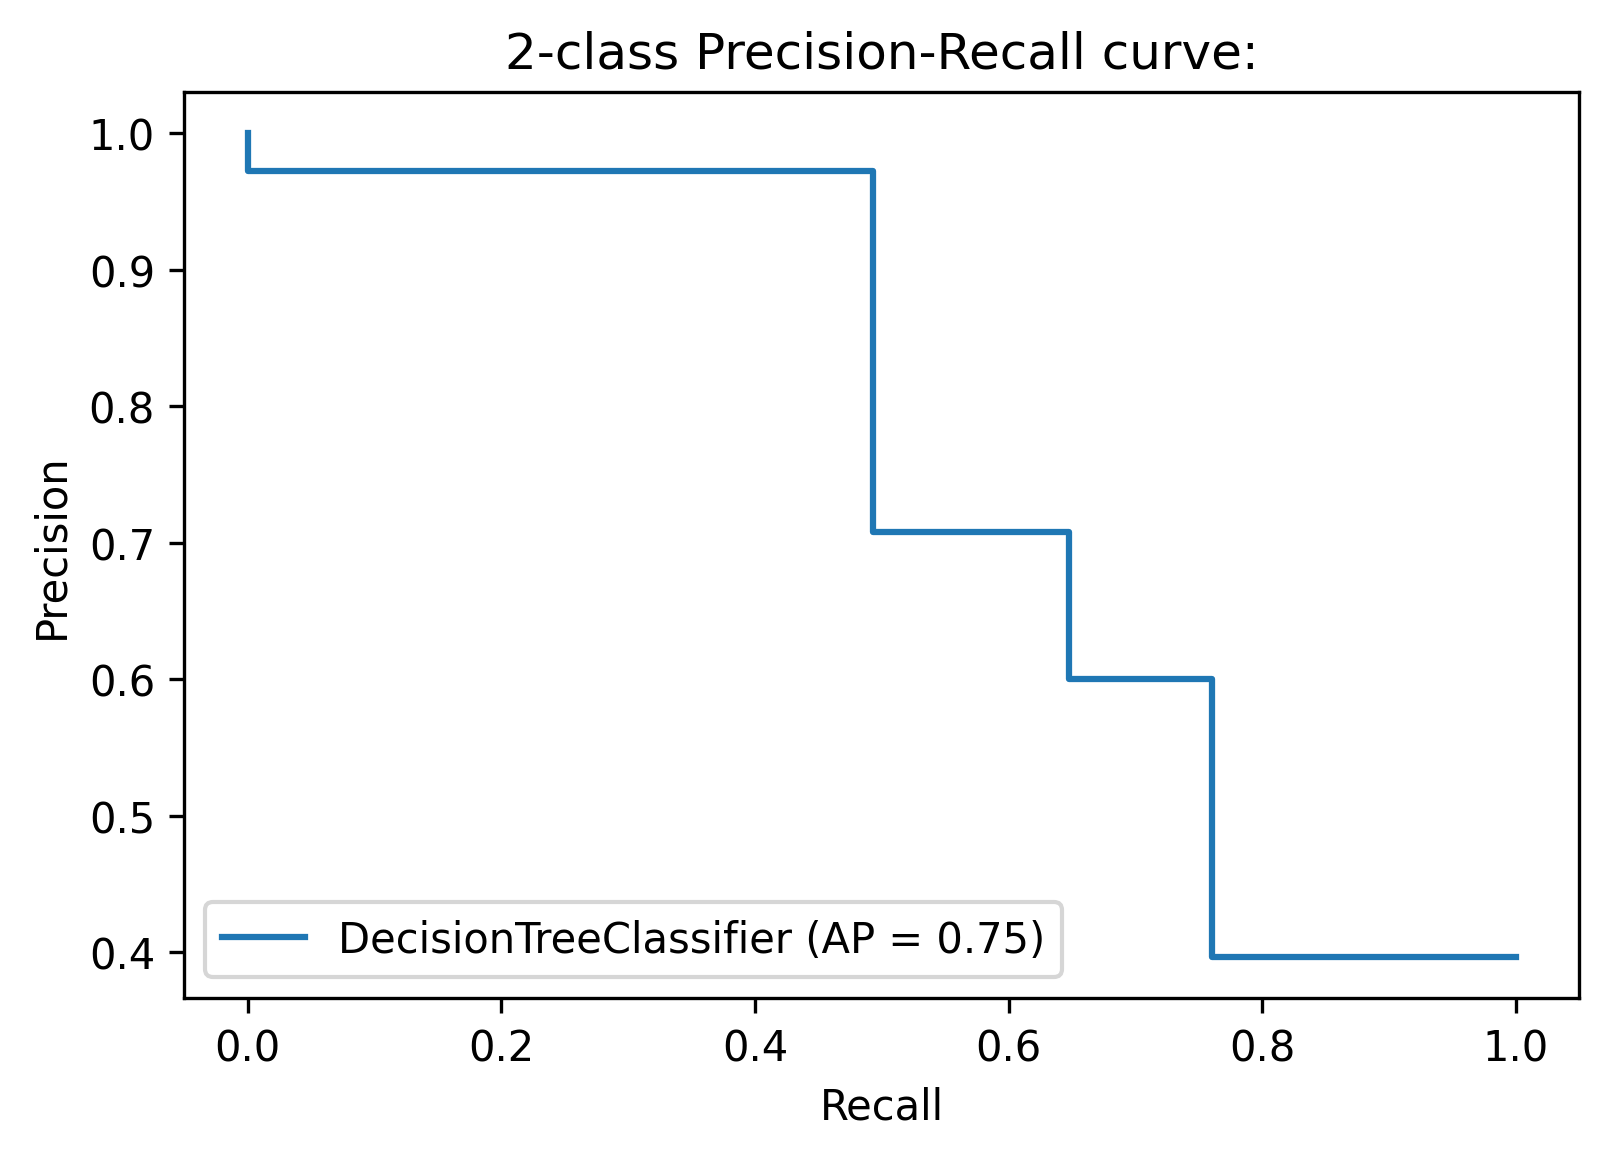

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
 

disp = plot_precision_recall_curve(clf,X_test,y_test)
disp.ax_.set_title('2-class Precision-Recall curve:')

#Matrix de Confusao do SVM

#F1-Score do SVM

In [ ]:
f1_score( y_pred, y_test )

0.3838383838383838

#Precision x Recall do SVM

Text(0.5, 1.0, '2-class Precision-Recall curve:')

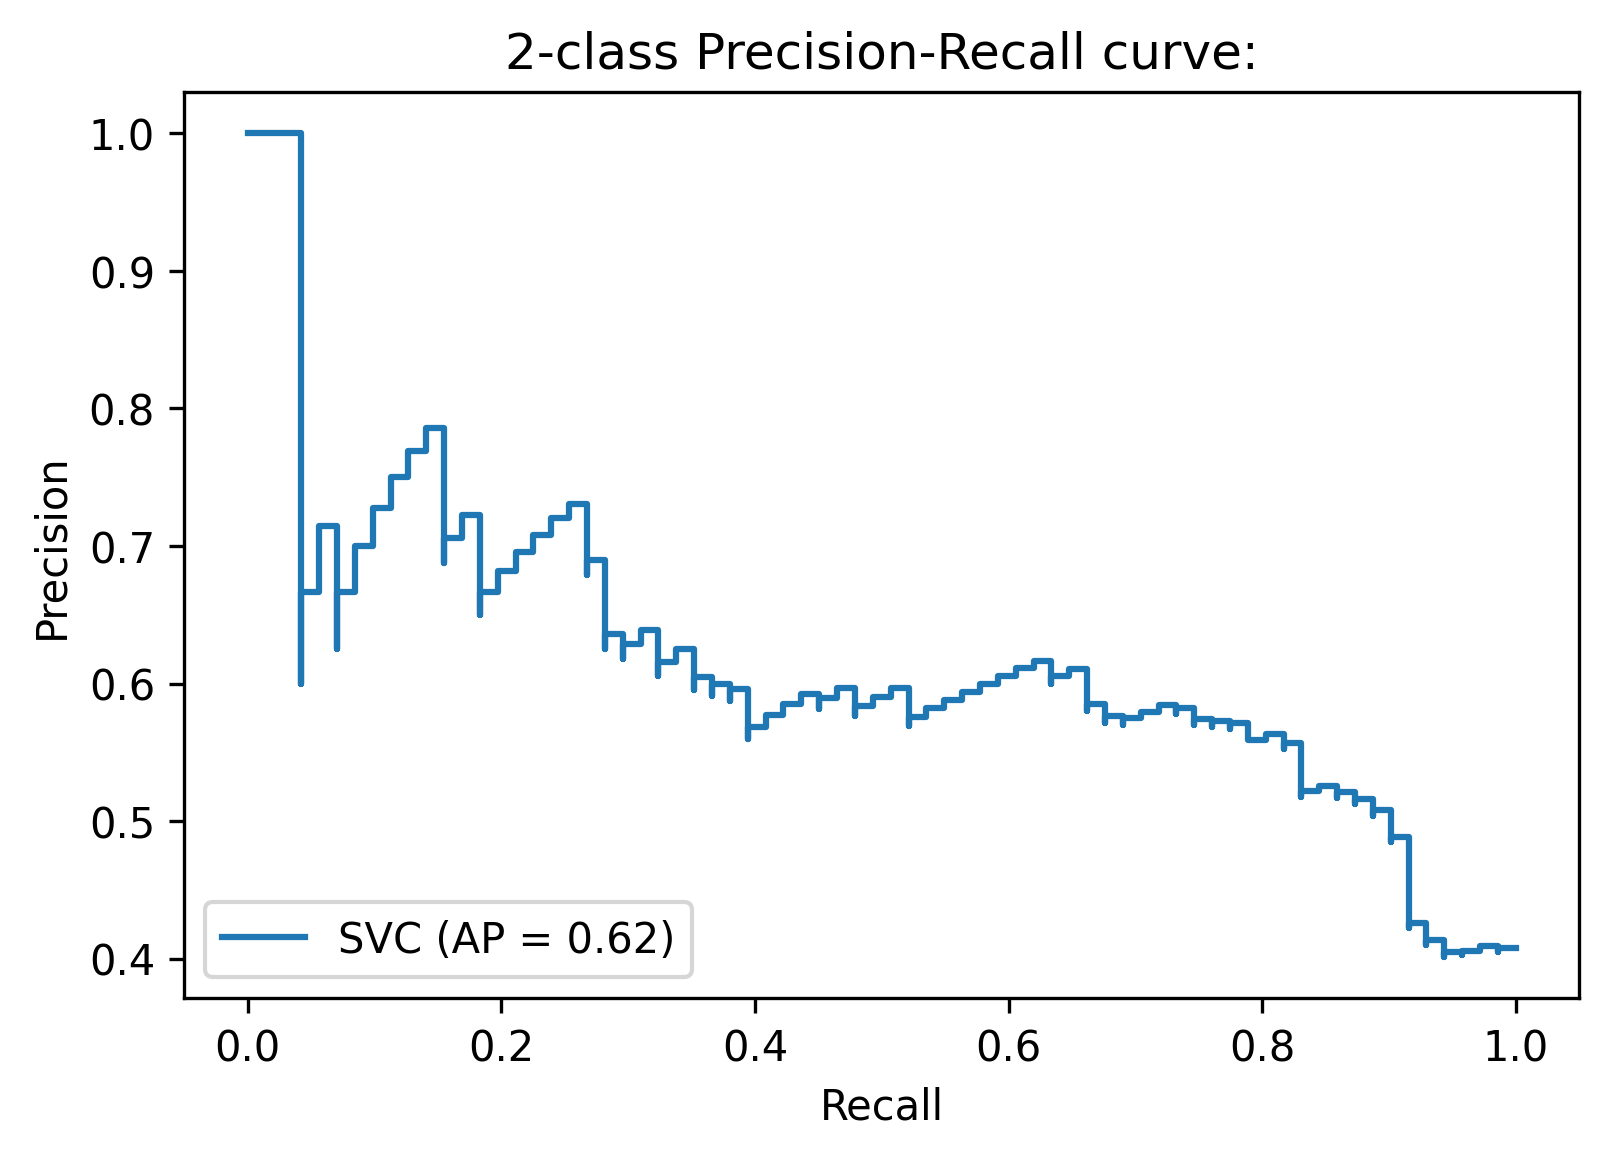

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svc,X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve:')

#Mais de 2 modelos no mesmo ROC

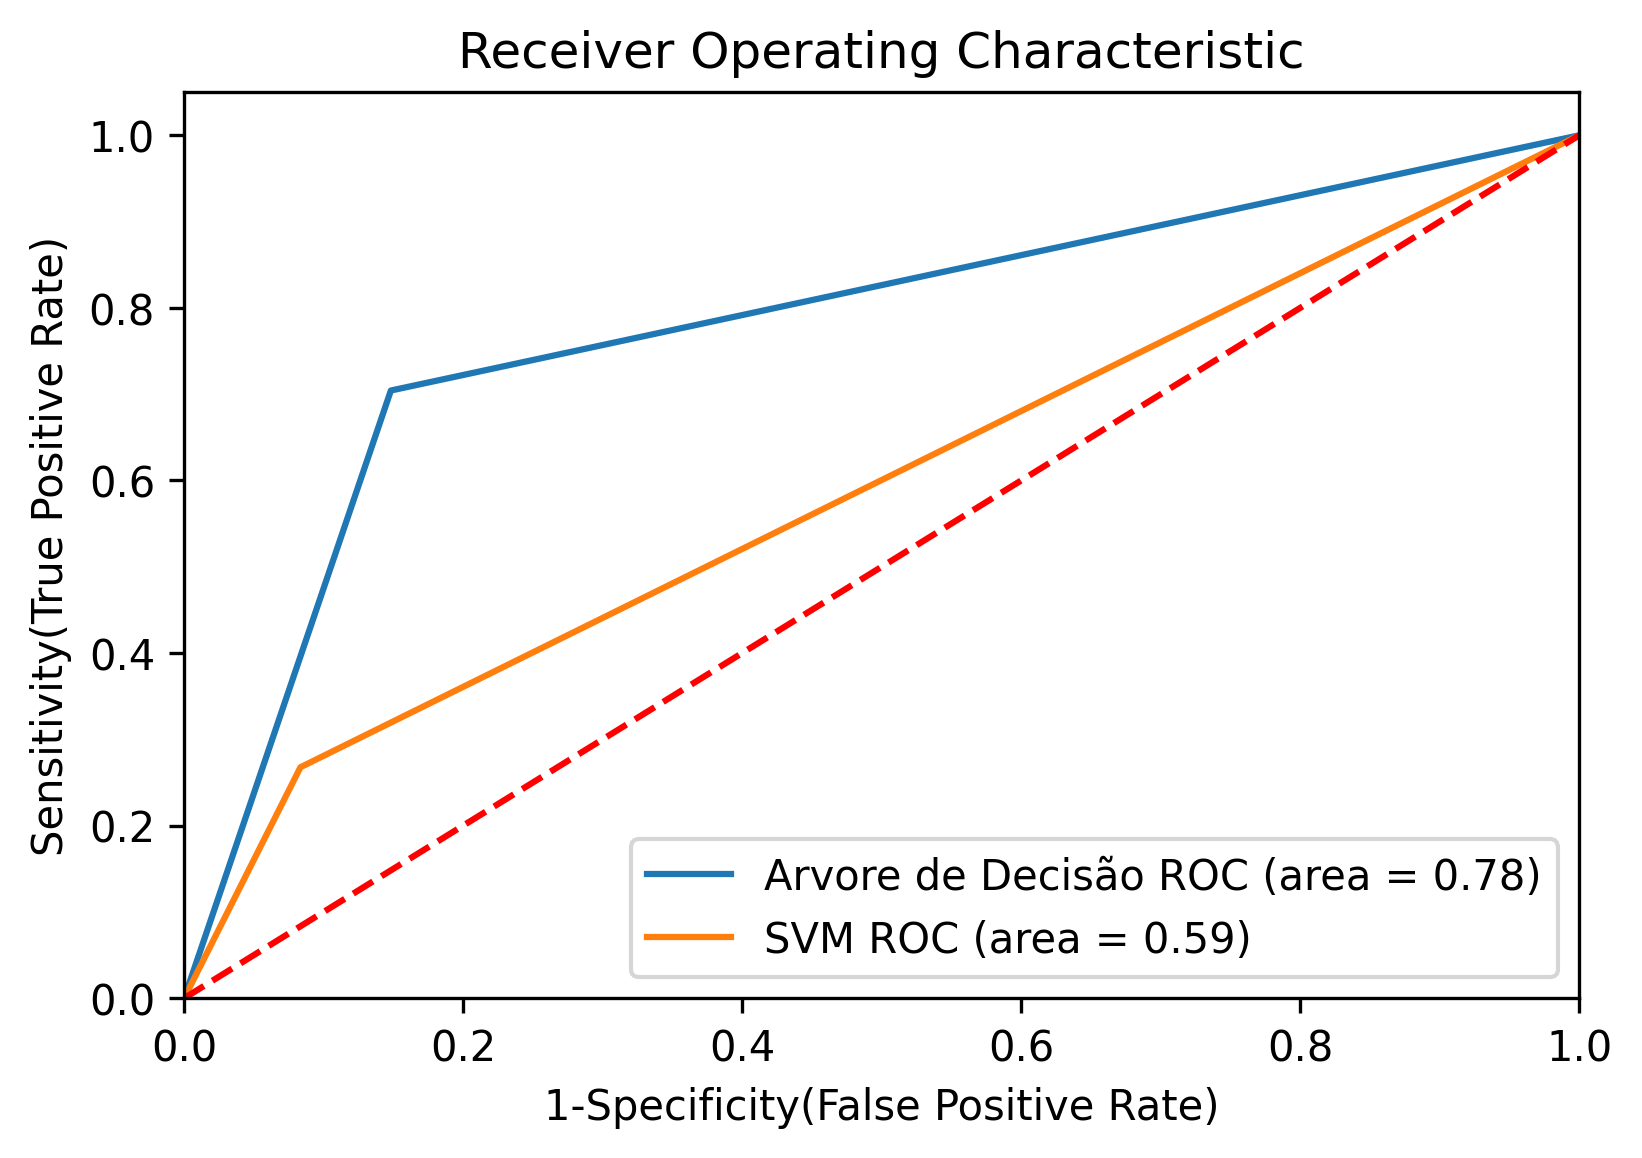

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Arvore de Decisão',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'SVM',
    'model': SVC(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train,y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(X_test))
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

## Classificador SVM 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)


65.92


##Matrix de Confusao do SVM 
- Verdadeiros positivos, Verdadeiros Negativos, Falsos Positivos e  Falsos NEgativos
- Precisão e Recall

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true negatives  (tn) =  99
Number of true positives  (tp) =  19
Number of false negatives (fn) =  9
Number of false positives (fp) =  52
Precision                                          = tp / (tp + fp) = 0.2676056338028169
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.6785714285714286
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.6556291390728477
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.3443708609271523
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.32142857142857145


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_pred, y_test), 2)}")

print("Matrix de Confusão:")
titanic_cm = confusion_matrix( y_pred, y_test)
print(titanic_cm)

Acurácia de Teste: 0.66
Matrix de Confusão:
[[99 52]
 [ 9 19]]


# Classificando com SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)


97.37


#Matrix de Confusao da IRIS

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

print("Matrix de Confusão:")
iris_cm = confusion_matrix( y_test_true, y_test_pred)
print(iris_cm)

Acurácia de Teste: 0.95
Matrix de Confusão:
[[16  0  0]
 [ 0  8  0]
 [ 0  2 12]]


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_true, y_test_pred)


array([[[22,  0],
        [ 0, 16]],

       [[28,  2],
        [ 0,  8]],

       [[24,  0],
        [ 2, 12]]])

In [ ]:
from sklearn.metrics import classification_report

label_names = iris.target_names

print(classification_report(y_test_true, y_test_pred,target_names=label_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      1.00      0.89         8
   virginica       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.93      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38

